<a href="https://colab.research.google.com/github/akshita18r/hello-world/blob/main/bajaj_stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Bajaj Stock Dataset.csv')

In [ ]:
df_copy= df.copy()

In [ ]:
df_copy.dropna(inplace= True)
df_copy.columns= df_copy.columns.str.strip()

In [ ]:
print(df_copy['Date'].duplicated().sum())  # Shows the number of duplicates


0


In [ ]:
print(df_copy.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
df_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,5.239737,5.540927,5.239737,5.412679,3.950042,21923.0
1,2002-07-02,5.523439,5.537041,5.421423,5.443769,3.972731,61044.0
2,2002-07-03,5.505950,5.545785,5.328151,5.466116,3.989039,34160.0
3,2002-07-04,5.501093,5.572018,5.417537,5.528297,4.034419,27892.0
4,2002-07-05,5.563274,5.656546,5.474860,5.590478,4.079795,58976.0


In [ ]:
df_copy['Date'] = df_copy['Date'].str.replace('/', '-')  # Convert '/' to '-'
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

In [ ]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format="%Y-%m-%d", errors='coerce')
df_copy.set_index('Date', inplace= True)

In [ ]:
df_copy = df_copy[~df_copy.index.duplicated(keep='first')]  # Remove duplicate dates (keeping the first occurrence)


In [ ]:
df_copy = df_copy[df_copy.index.notna()]  # Remove rows where Date (index) is NaT (invalid date)


In [ ]:
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,0.000194,0.000165,0.000192,0.000178,0.000121,0.000844
2002-07-02,0.000216,0.000169,0.000227,0.000178,0.000124,0.002351
2002-07-03,0.000204,0.000172,0.000225,0.000179,0.000126,0.001316
2002-07-04,0.000216,0.000179,0.000225,0.000182,0.000132,0.001074
2002-07-05,0.000223,0.000187,0.000232,0.000192,0.000137,0.002272


In [46]:
print(df_copy.index.dtype)


datetime64[ns]


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5481 entries, 2002-07-01 to 2024-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5481 non-null   float64
 1   High       5481 non-null   float64
 2   Low        5481 non-null   float64
 3   Close      5481 non-null   float64
 4   Adj Close  5481 non-null   float64
 5   Volume     5481 non-null   float64
dtypes: float64(6)
memory usage: 428.8 KB


Scaling

In [52]:
df_copy['Close'].fillna(method='ffill', inplace=True)  # Forward fill


<ipython-input-52-ba1c9df46ebb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Close'].fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-52-ba1c9df46ebb>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['Close'].fillna(method='ffill', inplace=True)  # Forward fill


In [53]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_copy[['Close', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df_copy[['Close', 'Open', 'High', 'Low', 'Volume']])


Train and Test

In [54]:
from sklearn.model_selection import train_test_split
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Target column (we'll predict 'Adj Close' price)
target_column = 'Adj Close'

# Splitting the data into X (features) and y (target)
X = df_copy[feature_columns]
y = df_copy[target_column]

# Train-Test Split (80% training, 20% testing)
# Removed the manual split and only use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ensure the data is split correctly (you can check a sample if needed)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 4384, Test set size: 1097


In [55]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [56]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0000
R² Score: 0.9987


In [57]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

              Actual  Predicted
Date                           
2020-02-20  0.590319   0.589703
2020-02-24  0.581060   0.580466
2020-02-25  0.583723   0.583181
2020-02-26  0.581792   0.581237
2020-02-27  0.575717   0.575157


Data Visualization

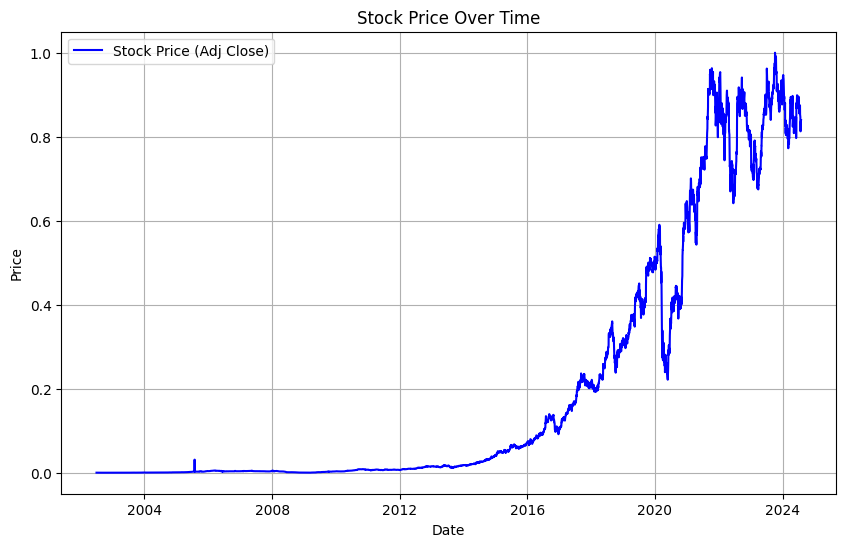

In [58]:
#(Line Plot) Visualize how the stock price (Adj Close) changes over time.
plt.figure(figsize=(10, 6))
plt.plot(df_copy.index, df_copy['Adj Close'], label='Stock Price (Adj Close)', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

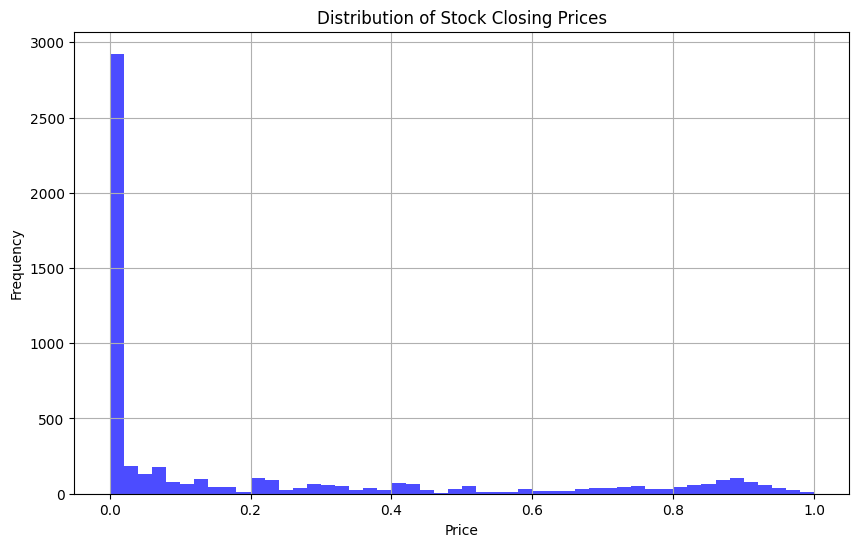

In [59]:
#Visualize the distribution of the stock's closing prices.
# Plot the histogram of the 'Close' price
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Close'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Stock Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


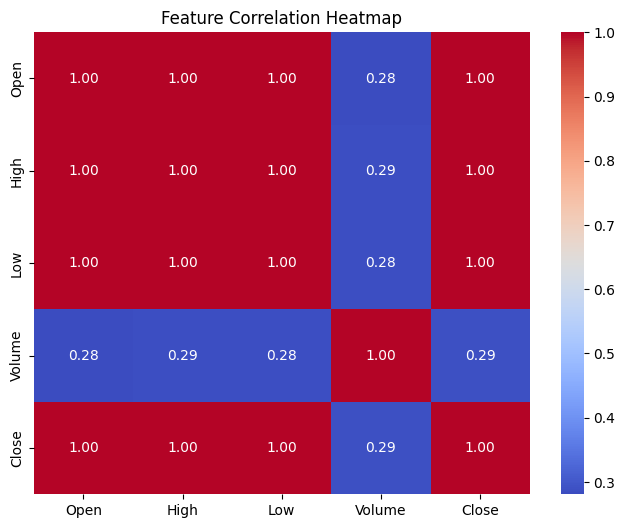

In [60]:
#Visualize how different features (Open, High, Low, Volume, Close) are correlated with each other using a heatmap.
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df_copy[['Open', 'High', 'Low', 'Volume', 'Close']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()


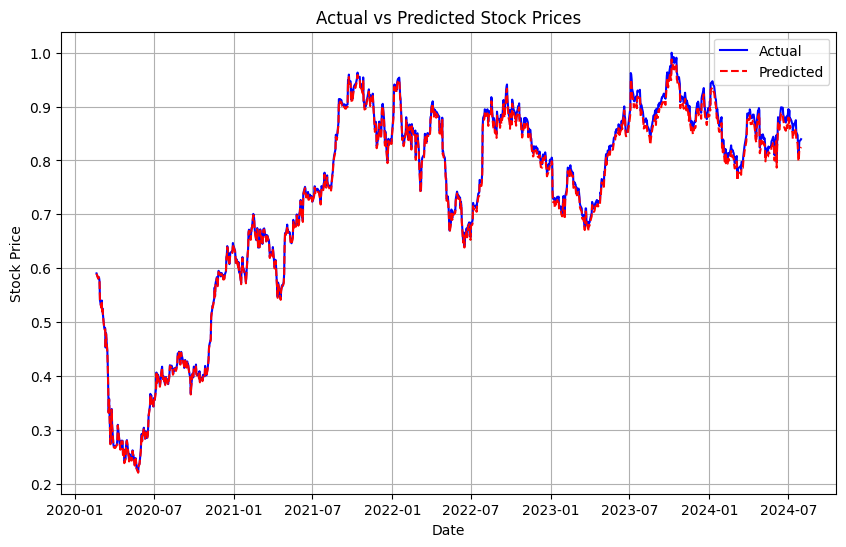

In [61]:
#Visualize the predicted stock prices versus the actual prices from the test data.
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
